# Import Libraries

In [115]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder,OneHotEncoder
from sklearn.preprocessing import MaxAbsScaler
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [116]:
import pandas as pd
df=pd.read_csv("train.csv")
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,-,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000 km,4.0,Manual,Rear,02-Mar,Left wheel,Silver,5
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600 km,4.0,Tiptronic,Front,04-May,Left wheel,Red,8
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365 km,4.0,Automatic,Front,04-May,Left wheel,Grey,4
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258 km,4.0,Automatic,Front,04-May,Left wheel,Black,4


In [117]:
df['Doors'].replace('02-Mar','2',inplace=True)
df['Doors'].replace('>5','5',inplace=True)
df['Doors'].replace('04-May','4',inplace=True)

In [118]:
import numpy as np

In [119]:
df['Levy'].replace('-', np.nan, inplace = True)

df['Levy'].replace( np.nan,-999, inplace = True)

In [120]:
df.isnull().sum()

ID                     0
Price                  0
Levy                5819
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
dtype: int64

In [121]:
df[['Levy']] = df[["Levy"]].astype("float64")

In [122]:
df['Levy'].replace(np.nan,df['Levy'].mean(), inplace = True)

df['Levy']=df['Levy'].replace(-999,df['Levy'].mean(),inplace=True)

In [123]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

In [124]:
df.Manufacturer.value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
                 ... 
PONTIAC             1
SATURN              1
LANCIA              1
GREATWALL           1
HAVAL               1
Name: Manufacturer, Length: 65, dtype: int64

In [125]:
#Manufacturer 
#setting values to other whose value count is less than 1000
man=set(i for i in df['Manufacturer'])
other=[]
for i in man:
    if df['Manufacturer'].value_counts()[i]<100:
        other.append(i)
df['Manufacturer']=df['Manufacturer'].apply(lambda x:'OTHER' if df['Manufacturer'].value_counts()[x]<100 else x)

In [126]:
df.Manufacturer.value_counts()

HYUNDAI          3769
TOYOTA           3662
MERCEDES-BENZ    2076
FORD             1111
CHEVROLET        1069
BMW              1049
LEXUS             982
HONDA             977
OTHER             904
NISSAN            660
VOLKSWAGEN        579
SSANGYONG         441
KIA               421
OPEL              397
MITSUBISHI        289
SUBARU            275
AUDI              255
MAZDA             183
JEEP              138
Name: Manufacturer, dtype: int64

In [127]:
df2=pd.read_csv('test.csv')

In [128]:
df2.isnull().sum()

ID                     0
Levy                   0
Manufacturer           0
Model                  0
Prod. year             0
Category               0
Leather interior       0
Fuel type              0
Engine volume          0
Mileage                0
Cylinders              0
Gear box type          0
Drive wheels           0
Doors                  0
Wheel                  0
Color                  0
Airbags                0
Price               8245
dtype: int64

In [129]:
cols = ['Price']
df2 = df2.drop(columns=cols, axis=1)
df2.head()

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,44020629,-,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0 km,4,Manual,Front,02-Mar,Left wheel,Grey,10
1,45784798,-,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000 km,4,Tiptronic,Front,04-May,Left wheel,Grey,10
2,45800257,-,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000 km,4,Automatic,Front,04-May,Right-hand drive,Sky blue,8
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000 km,6,Automatic,4x4,04-May,Left wheel,Blue,12
4,45814303,-,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000 km,4,Manual,Front,04-May,Left wheel,Black,0


In [130]:
df[['Levy']] = df[["Levy"]].astype("int")

In [131]:
df[['Doors']] = df[["Doors"]].astype("int")

In [132]:
d=list(df["Model"].unique())
print(len(d))
d

1590


['RX 450',
 'Equinox',
 'FIT',
 'Escape',
 'Santa FE',
 'Prius',
 'Sonata',
 'Camry',
 'RX 350',
 'E 350',
 'Transit',
 'Vectra',
 'CHR',
 'Elantra',
 'RX 400',
 'E 220',
 'GX 470',
 'Highlander',
 'Vito',
 'Cayenne',
 'X5',
 'Grand Cherokee',
 'CHR Limited',
 'H1',
 'Jetta',
 'Tacoma',
 'Prius C',
 'Aqua',
 'Escape Hybrid',
 'Civic',
 'Q7',
 'Megane 1.5CDI',
 'E 300',
 'Q5',
 'C 180',
 'GLA 250',
 'Juke',
 '535',
 'Cruze LT',
 'Fusion',
 'VOXY',
 'A 160',
 'Tucson',
 'Vitz',
 'Captiva',
 'Mustang',
 'ML 350',
 'Yaris',
 'Cr-v',
 'Cruze',
 'Orlando',
 'GL 63 AMG',
 '520 Vanos',
 'Forester',
 'Lacetti',
 '428 Sport Line',
 'Patrol',
 'E 320',
 'Genesis',
 '911',
 'GX 460',
 'Sprinter',
 'Focus SE',
 'Picanto',
 '328',
 'Explorer',
 'Airtrek',
 'E 500 AMG',
 'Lancer',
 'Korando',
 'Clio',
 '616',
 'C 220',
 'Serena',
 'Maxima',
 'RAV 4',
 'Pajero',
 'Volt',
 'TERRAIN',
 '208',
 'Hr-v EX',
 '500',
 'Legacy',
 'Elantra sport limited',
 'Sienna',
 'A 170',
 'NX 300',
 'REXTON',
 'Carnival g

In [133]:
df[['Mileage']] = df[["Mileage"]].astype("str")
df['Mileage'] = df['Mileage'].str.replace(' km', '')

In [134]:
df['Mileage']

0        186005
1        192000
2        200000
3        168966
4         91901
          ...  
19232    300000
19233    161600
19234    116365
19235     51258
19236    186923
Name: Mileage, Length: 19237, dtype: object

In [135]:
df[['Mileage']] = df[["Mileage"]].astype("int64")

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  int32  
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  int64  
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  int32  
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [137]:
# new data frame with split value columns
new = df["Engine volume"].str.split(" ", n = 1, expand = True)
                                    
# making separate first name column from new data frame
df["Engine volume num"]= new[0]
                                    
# making separate last name column from new data frame
df["turbo"]= new[1] 
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,None
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3,None
2,45774419,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,None
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,None
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,906,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,2.0,Turbo
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,2.4,None
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,2,None
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,4,Left wheel,Black,4,2,None


In [138]:
df[['Engine volume num']] = df[["Engine volume num"]].astype("float64")

In [139]:
df['turbo'].replace('None',0,inplace=True)
df['turbo'].replace('Turbo',1,inplace=True)

In [140]:
df['turbo'].unique()

array([nan,  1.])

In [141]:
df['turbo'].replace(np.nan,0,inplace=True)

In [142]:
df[['turbo']] = df[["turbo"]].astype("uint8")

In [143]:
df

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,0
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3.0,0
2,45774419,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,0
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,45798355,8467,906,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,2.0 Turbo,300000,4.0,Manual,Rear,2,Left wheel,Silver,5,2.0,1
19233,45778856,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,2.4,0
19234,45804997,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,2,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,2.0,0
19235,45793526,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,2,51258,4.0,Automatic,Front,4,Left wheel,Black,4,2.0,0


In [144]:
df.drop("ID",axis=1,inplace=True)
df.drop("Mileage",axis=1,inplace=True)
df.drop("Engine volume",axis=1,inplace=True)

In [145]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo
0,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,6.0,Automatic,4x4,4,Left wheel,Silver,12,3.5,0
1,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,6.0,Tiptronic,4x4,4,Left wheel,Black,8,3.0,0
2,8467,906,HONDA,FIT,2006,Hatchback,No,Petrol,4.0,Variator,Front,4,Right-hand drive,Black,2,1.3,0
3,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,4.0,Automatic,4x4,4,Left wheel,White,0,2.5,0
4,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,4.0,Automatic,Front,4,Left wheel,Silver,4,1.3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,906,MERCEDES-BENZ,CLK 200,1999,Coupe,Yes,CNG,4.0,Manual,Rear,2,Left wheel,Silver,5,2.0,1
19233,15681,831,HYUNDAI,Sonata,2011,Sedan,Yes,Petrol,4.0,Tiptronic,Front,4,Left wheel,Red,8,2.4,0
19234,26108,836,HYUNDAI,Tucson,2010,Jeep,Yes,Diesel,4.0,Automatic,Front,4,Left wheel,Grey,4,2.0,0
19235,5331,1288,CHEVROLET,Captiva,2007,Jeep,Yes,Diesel,4.0,Automatic,Front,4,Left wheel,Black,4,2.0,0


In [146]:
cols = [['Manufacturer',"Model","Category",'Leather interior',"Fuel type","Gear box type","Drive wheels",'Wheel','Color']]
le = OrdinalEncoder()
for col in cols:
    df[col] = le.fit_transform(df[col])

In [147]:
sts = MaxAbsScaler()

In [148]:
feature_scale = ['Levy','Cylinders','Doors','Airbags','Engine volume num']
df[feature_scale]=sts.fit_transform(df[feature_scale])

In [149]:
df

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo
0,13328,0.119430,8.0,1242.0,2010,4.0,1.0,2.0,0.375,0.0,0.0,0.8,0.0,12.0,0.7500,0.175,0
1,16621,0.086905,2.0,658.0,2011,4.0,0.0,5.0,0.375,2.0,0.0,0.8,0.0,1.0,0.5000,0.150,0
2,8467,0.077343,4.0,684.0,2006,3.0,0.0,5.0,0.250,3.0,1.0,0.8,1.0,1.0,0.1250,0.065,0
3,3607,0.073587,3.0,661.0,2011,4.0,1.0,2.0,0.250,0.0,0.0,0.8,0.0,14.0,0.0000,0.125,0
4,11726,0.038074,4.0,684.0,2014,3.0,1.0,5.0,0.250,0.0,1.0,0.8,0.0,12.0,0.2500,0.065,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19232,8467,0.077343,10.0,385.0,1999,1.0,1.0,0.0,0.250,1.0,2.0,0.4,0.0,12.0,0.3125,0.100,1
19233,15681,0.070941,5.0,1334.0,2011,9.0,1.0,5.0,0.250,2.0,1.0,0.8,0.0,11.0,0.5000,0.120,0
19234,26108,0.071368,5.0,1442.0,2010,4.0,1.0,1.0,0.250,0.0,1.0,0.8,0.0,7.0,0.2500,0.100,0
19235,5331,0.109954,2.0,456.0,2007,4.0,1.0,1.0,0.250,0.0,1.0,0.8,0.0,1.0,0.2500,0.100,0


In [150]:
x=df.drop(['Price'],axis=1)
y=df['Price']

In [58]:
model = XGBRegressor()

In [59]:
model.fit(x,y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [60]:
model.score(x,y)

0.9989013159719666

In [61]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [62]:
def DistributionPlot(RedFunction, BlueFunction, RedName, BlueName, Title):
    width = 12
    height = 10
    plt.figure(figsize=(width, height))

    ax1 = sns.distplot(RedFunction, hist=False, color="r", label=RedName)
    ax2 = sns.distplot(BlueFunction, hist=False, color="b", label=BlueName, ax=ax1)

    plt.title(Title)
    legend = plt.legend(loc = "upper right",fontsize = "medium")
    plt.xlabel('no. of entries')
    plt.ylabel('Loan sanctitioned USD')
    
    plt.show()
    plt.close()

In [63]:
y_predicted2=model.predict(x)

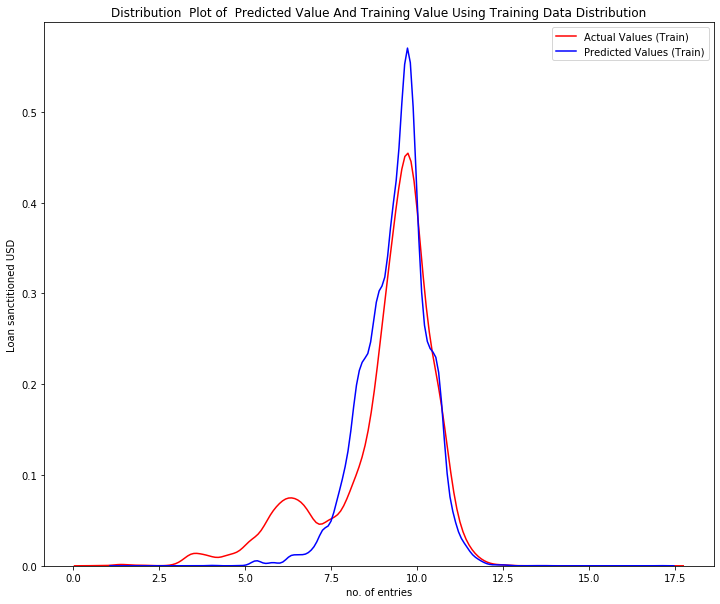

In [64]:
Title = 'Distribution  Plot of  Predicted Value And Training Value Using Training Data Distribution'
DistributionPlot(np.log(y+1),np.log(y_predicted2+1) , "Actual Values (Train)", "Predicted Values (Train)", Title)

In [105]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   ID                8245 non-null   int64 
 1   Levy              8245 non-null   object
 2   Manufacturer      8245 non-null   object
 3   Model             8245 non-null   object
 4   Prod. year        8245 non-null   int64 
 5   Category          8245 non-null   object
 6   Leather interior  8245 non-null   object
 7   Fuel type         8245 non-null   object
 8   Engine volume     8245 non-null   object
 9   Mileage           8245 non-null   object
 10  Cylinders         8245 non-null   int64 
 11  Gear box type     8245 non-null   object
 12  Drive wheels      8245 non-null   object
 13  Doors             8245 non-null   object
 14  Wheel             8245 non-null   object
 15  Color             8245 non-null   object
 16  Airbags           8245 non-null   int64 
dtypes: int64(4), o

In [106]:
df2['Levy'].replace('-',np.nan,inplace=True)

In [107]:
df2[['Levy']] = df2[["Levy"]].astype("float64")

In [108]:
df2['Levy'].replace(np.nan,df2['Levy'].mean(),inplace=True)

In [109]:
df2[['Levy']] = df2[["Levy"]].astype("int64")

In [110]:
df2['Doors'].unique()

array(['02-Mar', '04-May', '>5'], dtype=object)

In [111]:
df2['Doors'].replace('02-Mar','2',inplace=True)
df2['Doors'].replace('>5','5',inplace=True)
df2['Doors'].replace('04-May','4',inplace=True)

In [112]:
df2[['Doors']] = df2[["Doors"]].astype("int")

In [113]:
df2['Mileage'].unique()

array(['0 km', '26000 km', '168000 km', ..., '81109 km', '146697 km',
       '148633 km'], dtype=object)

In [114]:
df2[['Mileage']] = df2[["Mileage"]].astype("str")
df2['Mileage'] = df2['Mileage'].str.replace(' km', '')

In [115]:
df2[['Mileage']] = df2[["Mileage"]].astype("int64")

In [116]:
# new data frame with split value columns
new = df2["Engine volume"].str.split(" ", n = 1, expand = True)
                                    
# making separate first name column from new data frame
df2["Engine volume num"]= new[0]
                                    
# making separate last name column from new data frame
df2["turbo"]= new[1] 
df2

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo
0,44020629,917,VOLKSWAGEN,Golf,2012,Hatchback,No,Diesel,2.0 Turbo,0,4,Manual,Front,2,Left wheel,Grey,10,2.0,Turbo
1,45784798,917,HYUNDAI,Sonata,2012,Sedan,Yes,Petrol,2.4,26000,4,Tiptronic,Front,4,Left wheel,Grey,10,2.4,None
2,45800257,917,NISSAN,Tiida,2005,Sedan,No,Petrol,1.5,168000,4,Automatic,Front,4,Right-hand drive,Sky blue,8,1.5,None
3,45797981,975,VOLVO,XC90,2012,Jeep,Yes,Petrol,3.2,143000,6,Automatic,4x4,4,Left wheel,Blue,12,3.2,None
4,45814303,917,OPEL,Astra,1993,Hatchback,No,Petrol,1.6,200000,4,Manual,Front,4,Left wheel,Black,0,1.6,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,44824410,1357,FIAT,Stilo,2004,Universal,No,Petrol,1.6,164000,4,Manual,Front,4,Left wheel,Blue,6,1.6,None
8241,45682346,917,BMW,528 F10,2012,Sedan,Yes,Petrol,2.8 Turbo,156000,4,Tiptronic,Front,4,Left wheel,Black,6,2.8,Turbo
8242,45649860,1646,LEXUS,GX 460,2015,Jeep,Yes,Petrol,4.6,102907,8,Automatic,4x4,4,Left wheel,Black,0,4.6,None
8243,45809706,784,TOYOTA,Aqua,2017,Hatchback,Yes,Petrol,1.5,3000,4,Automatic,Front,4,Left wheel,Green,4,1.5,None


In [117]:
df2[['Engine volume num']] = df2[["Engine volume num"]].astype("float64")

In [118]:
df2['turbo'].replace('None',0,inplace=True)
df2['turbo'].replace('Turbo',1,inplace=True)

In [119]:
df2['turbo'].unique()

array([ 1., nan])

In [120]:
df2['turbo'].replace(np.nan,0,inplace=True)

In [121]:
df2[['turbo']] = df2[["turbo"]].astype("uint8")

In [122]:
cols = ['Manufacturer',"Model","Category",'Leather interior',"Fuel type","Gear box type","Drive wheels",'Wheel','Color','Engine volume']
le = OrdinalEncoder()
for col in cols:
    df2[col] = le.fit_transform(df2[col])

In [123]:
feature_scale = ['ID','Levy','Prod. year','Cylinders','Doors','Airbags','Mileage','Engine volume num','Manufacturer',"Model","Category",'Leather interior',"Fuel type","Gear box type","Drive wheels",'Wheel','Color']
df2[feature_scale]=sts.fit_transform(df2[feature_scale])

In [124]:
df2

,ID,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Engine volume num,turbo
0,0.960800,0.121812,0.950820,0.524145,0.996040,0.3,0.0,0.166667,32,0.000000,0.031496,0.333333,0.5,0.4,0.0,0.466667,0.625,0.185185,1
1,0.999305,0.121812,0.377049,0.842052,0.996040,0.9,1.0,0.833333,39,0.000012,0.031496,0.666667,0.5,0.8,0.0,0.466667,0.625,0.222222,0
2,0.999642,0.121812,0.655738,0.890342,0.992574,0.9,0.0,0.833333,20,0.000078,0.031496,0.000000,0.5,0.8,1.0,0.866667,0.500,0.138889,0
3,0.999593,0.129516,0.967213,0.975855,0.996040,0.4,1.0,0.833333,54,0.000067,0.047244,0.000000,0.0,0.8,0.0,0.133333,0.750,0.296296,0
4,0.999949,0.121812,0.672131,0.165996,0.986634,0.3,0.0,0.833333,22,0.000093,0.031496,0.333333,0.5,0.8,0.0,0.066667,0.000,0.148148,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8240,0.978343,0.180260,0.245902,0.872233,0.992079,1.0,0.0,0.833333,22,0.000076,0.031496,0.333333,0.5,0.8,0.0,0.133333,0.375,0.148148,0
8241,0.997069,0.121812,0.081967,0.096579,0.996040,0.9,1.0,0.833333,48,0.000073,0.031496,0.666667,0.5,0.8,0.0,0.066667,0.375,0.259259,1
8242,0.996360,0.218650,0.491803,0.512072,0.997525,0.4,1.0,0.833333,75,0.000048,0.062992,0.000000,0.0,0.8,0.0,0.066667,0.000,0.425926,0
8243,0.999849,0.104145,0.901639,0.156942,0.998515,0.3,1.0,0.833333,20,0.000001,0.031496,0.000000,0.5,0.8,0.0,0.400000,0.250,0.138889,0


In [125]:
y_predicted1=model.predict(df2)

In [126]:
y_predicted1

array([13446.389 , 21727.633 ,  4394.7124, ..., 12499.797 , 45975.79  ,
        -660.9985], dtype=float32)

In [127]:
submission=pd.DataFrame({
    'Price':abs(y_predicted1)
})
submission

,Price
0,13446.388672
1,21727.632812
2,4394.712402
3,5435.087891
4,5356.021484
...,...
8240,2926.989014
8241,24032.802734
8242,12499.796875
8243,45975.789062


In [128]:
submission.to_csv('fourth_try.csv',index=False)

In [61]:
from lightgbm import LGBMRegressor

In [62]:
model1 = LGBMRegressor()

In [63]:
model1.fit(x,y)

LGBMRegressor()

In [64]:
model1.score(x,y)

0.5093323414708605

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 19237 non-null  float64
 1   Price              19237 non-null  int64  
 2   Levy               19237 non-null  float64
 3   Manufacturer       19237 non-null  int32  
 4   Model              19237 non-null  int32  
 5   Prod. year         19237 non-null  float64
 6   Category           19237 non-null  int32  
 7   Leather interior   19237 non-null  int32  
 8   Fuel type          19237 non-null  int32  
 9   Engine volume      19237 non-null  int32  
 10  Mileage            19237 non-null  float64
 11  Cylinders          19237 non-null  float64
 12  Gear box type      19237 non-null  int32  
 13  Drive wheels       19237 non-null  int32  
 14  Doors              19237 non-null  float64
 15  Wheel              19237 non-null  int32  
 16  Color              192

In [60]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8245 entries, 0 to 8244
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 8245 non-null   float64
 1   Levy               8245 non-null   float64
 2   Manufacturer       8245 non-null   int32  
 3   Model              8245 non-null   int32  
 4   Prod. year         8245 non-null   float64
 5   Category           8245 non-null   int32  
 6   Leather interior   8245 non-null   int32  
 7   Fuel type          8245 non-null   int32  
 8   Engine volume      8245 non-null   int32  
 9   Mileage            8245 non-null   float64
 10  Cylinders          8245 non-null   float64
 11  Gear box type      8245 non-null   int32  
 12  Drive wheels       8245 non-null   int32  
 13  Doors              8245 non-null   float64
 14  Wheel              8245 non-null   int32  
 15  Color              8245 non-null   int32  
 16  Airbags            8245 

In [61]:
df.to_csv('train_try.csv',index=False)

In [62]:
df2.to_csv('test_try.csv',index=False)

In [211]:
from mlxtend.regressor import StackingCVRegressor
from sklearn.linear_model import Ridge, Lasso
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from lightgbm import LGBMRegressor
from xgboost import XGBRegressor

xgb = XGBRegressor()
lgbm = LGBMRegressor()
rf = RandomForestRegressor()
ridge = Ridge()
lasso = Lasso()
svr = SVR(kernel='linear')

In [219]:
stack = StackingCVRegressor(regressors=(ridge,lgbm, xgb,lasso,svr,rf),
                            meta_regressor=xgb, cv=12,
                            use_features_in_secondary=True,
                            store_train_meta_features=True,
                            shuffle=False,
                            random_state=42)



In [ ]:
stack.fit(X_train, y_train)

In [ ]:
pred = stack.predict(X_test)
score = r2_score(y_test, pred)

In [ ]:
score

In [ ]:
stack.score(X_train,y_train)

In [220]:
stack.fit(x,y)

StackingCVRegressor(cv=12,
                    meta_regressor=XGBRegressor(base_score=None, booster=None,
                                                colsample_bylevel=None,
                                                colsample_bynode=None,
                                                colsample_bytree=None,
                                                gamma=None, gpu_id=None,
                                                importance_type='gain',
                                                interaction_constraints=None,
                                                learning_rate=None,
                                                max_delta_step=None,
                                                max_depth=None,
                                                min_child_weight=None,
                                                missing=nan,
                                                monotone_constraints=None,
                                                n

In [221]:
stack.score(x,y)

-0.4687190803130623

In [222]:
y_predicted2=stack.predict(x)

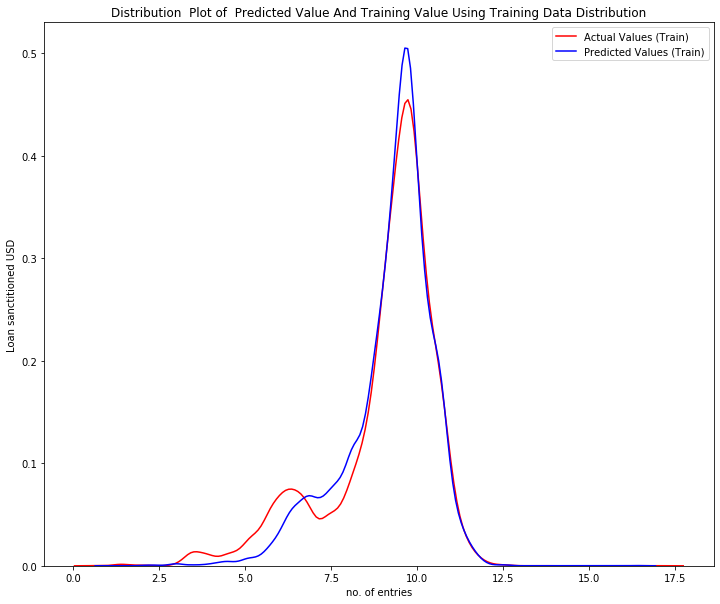

In [223]:
Title = 'Distribution  Plot of  Predicted Value And Training Value Using Training Data Distribution'
DistributionPlot(np.log(1+y), np.log(1+y_predicted2), "Actual Values (Train)", "Predicted Values (Train)", Title)

In [224]:
y_predicted2

array([13516.872 , 14571.544 ,  8185.2876, ..., 20994.293 ,  5159.1353,
         978.9933], dtype=float32)

In [65]:
df.to_csv('trainml.csv',index=False)

In [87]:
import h2o

In [88]:
from h2o.automl import H2OAutoML
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
; Java HotSpot(TM) 64-Bit Server VM (build 15.0.2+7-27, mixed mode, sharing)
  Starting server from C:\ProgramData\Anaconda3\lib\site-packages\h2o\backend\bin\h2o.jar
  Ice root: C:\Users\ayush\AppData\Local\Temp\tmplkplf9cj
  JVM stdout: C:\Users\ayush\AppData\Local\Temp\tmplkplf9cj\h2o_ayush_started_from_python.out
  JVM stderr: C:\Users\ayush\AppData\Local\Temp\tmplkplf9cj\h2o_ayush_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,05 secs
H2O_cluster_timezone:,Asia/Kolkata
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.32.1.4
H2O_cluster_version_age:,9 days
H2O_cluster_name:,H2O_from_python_ayush_x1dw6t
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,880 Mb
H2O_cluster_total_cores:,0
H2O_cluster_allowed_cores:,0
H2O_cluster_status:,"accepting new members, healthy"


In [89]:
data_path=r'trainml.csv'

In [90]:
df=h2o.import_file(data_path)

Parse progress: |█████████████████████████████████████████████████████████| 100%


In [91]:
y='Price'
x=df.columns

x=df.drop(['Price'],axis=1)
y=df['Price']

In [92]:
aml = H2OAutoML(max_models=10,seed=1)
aml.train(x=x,y=y,training_frame=df)

AutoML progress: |
15:33:02.562: AutoML: XGBoost is not available; skipping it.

████████████████████████████████████████████████████████| 100%


In [93]:
lb = aml.leaderboard

In [94]:
lb

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_AllModels_AutoML_20210717_153302,3.61668e+10,190176,3.61668e+10,9383.28,nan
DeepLearning_1_AutoML_20210717_153302,3.6168e+10,190179,3.6168e+10,9305.37,nan
StackedEnsemble_BestOfFamily_AutoML_20210717_153302,3.61717e+10,190189,3.61717e+10,9396.05,nan
GBM_5_AutoML_20210717_153302,3.62872e+10,190492,3.62872e+10,9510.31,nan
GLM_1_AutoML_20210717_153302,3.63236e+10,190587,3.63236e+10,14018.8,1.77713
GBM_4_AutoML_20210717_153302,3.74943e+10,193635,3.74943e+10,10390.8,nan
GBM_3_AutoML_20210717_153302,3.77149e+10,194203,3.77149e+10,10945.4,nan
GBM_2_AutoML_20210717_153302,3.8209e+10,195471,3.8209e+10,11878.4,nan
GBM_grid__1_AutoML_20210717_153302_model_1,4.0254e+10,200634,4.0254e+10,13755.5,nan
XRT_1_AutoML_20210717_153302,4.07179e+10,201787,4.07179e+10,8676.08,1.26925


In [95]:
#get model ids for all models in automl leaderboard
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [96]:
#get the All models styacked ensemble model
se = h2o.get_model([mid for mid in model_ids if 'StackedEnsemble_AllModels' in mid][0])

In [97]:
#get the stacked ensemble meta learner model
metalearner = h2o.get_model(se.metalearner()['name'])

In [98]:
metalearner.coef_norm()

{'Intercept': 18555.927223579543,
 'DeepLearning_1_AutoML_20210717_153302': 10802.239955165724,
 'GBM_5_AutoML_20210717_153302': 2800.6713340172346,
 'GLM_1_AutoML_20210717_153302': 0.0,
 'GBM_4_AutoML_20210717_153302': 0.0,
 'GBM_3_AutoML_20210717_153302': 0.0,
 'GBM_2_AutoML_20210717_153302': 0.0,
 'GBM_grid__1_AutoML_20210717_153302_model_1': 0.0,
 'XRT_1_AutoML_20210717_153302': 37.82655221321246,
 'DRF_1_AutoML_20210717_153302': 0.0,
 'GBM_1_AutoML_20210717_153302': 0.0}

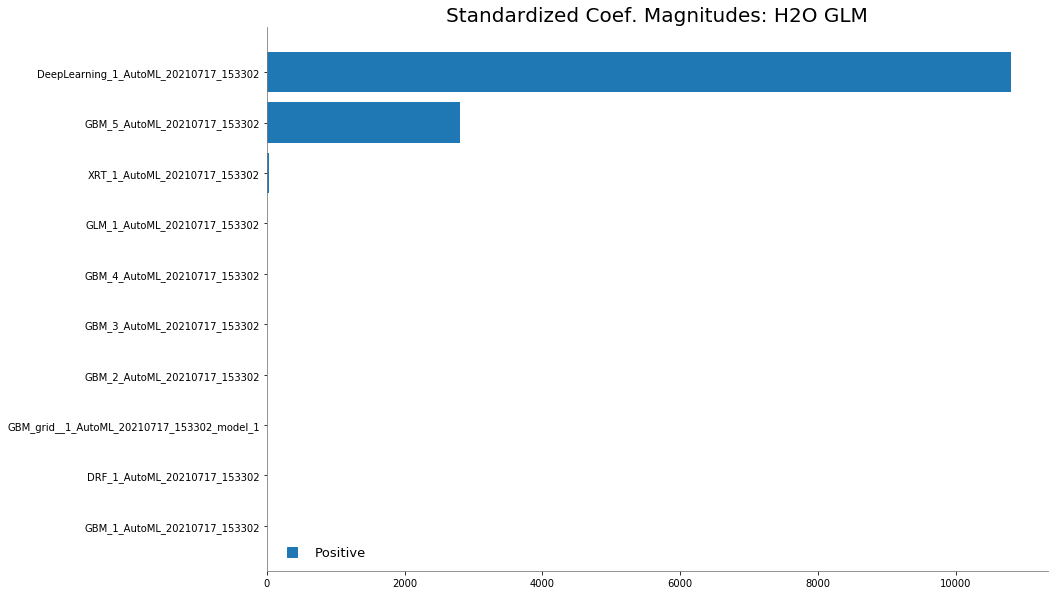

In [99]:
%matplotlib inline
metalearner.std_coef_plot()

In [101]:
car_h2o_deepl = h2o.get_model("DeepLearning_1_AutoML_20210717_153302")

In [102]:
car_h2o_deepl

Model Details
H2ODeepLearningEstimator :  Deep Learning
Model Key:  DeepLearning_1_AutoML_20210717_153302


Status of Neuron Layers: predicting Price, regression, gaussian distribution, Quadratic loss, 401 weights/biases, 12.1 KB, 219,271 training samples, mini-batch size 1


,,layer,units,type,dropout,l1,l2,mean_rate,rate_rms,momentum,mean_weight,weight_rms,mean_bias,bias_rms
0,,1,16,Input,0.0,,,,,,,,,
1,,2,10,Rectifier,0.0,0.0,0.0,0.026561,0.013684,0.0,0.00952,0.212022,0.443001,0.105998
2,,3,10,Rectifier,0.0,0.0,0.0,0.014704,0.008641,0.0,-0.018271,0.294565,0.970233,0.074194
3,,4,10,Rectifier,0.0,0.0,0.0,0.097437,0.246201,0.0,-0.012541,0.290111,0.971524,0.066812
4,,5,1,Linear,,0.0,0.0,0.004015,0.003265,0.0,0.048765,0.338153,0.018328,0.0




ModelMetricsRegression: deeplearning
** Reported on train data. **

MSE: 227676092.86013335
RMSE: 15088.939421315647
MAE: 7734.190230062938
RMSLE: NaN
Mean Residual Deviance: 227676092.86013335

ModelMetricsRegression: deeplearning
** Reported on cross-validation data. **

MSE: 36167970072.04662
RMSE: 190178.784495134
MAE: 9305.371564979034
RMSLE: NaN
Mean Residual Deviance: 36167970072.04662

Cross-Validation Metrics Summary: 


,,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
0,mae,9305.494,2818.7122,8114.8506,8146.703,7980.0796,14345.351,7940.4854
1,mean_residual_deviance,3.6171702E10,8.0392659E10,2.15484128E8,3.22689088E8,1.68593424E8,1.79982418E11,1.69327792E8
2,mse,3.6171702E10,8.0392659E10,2.15484128E8,3.22689088E8,1.68593424E8,1.79982418E11,1.69327792E8
3,r2,0.3585737,0.20665386,0.48775917,0.36144042,0.47669834,1.6304322E-4,0.46680748
4,residual_deviance,3.6171702E10,8.0392659E10,2.15484128E8,3.22689088E8,1.68593424E8,1.79982418E11,1.69327792E8
5,rmse,96576.65,183182.47,14679.378,17963.549,12984.353,424243.34,13012.602
6,rmsle,NaN,0.0,NaN,NaN,NaN,NaN,NaN



Scoring History: 


,,timestamp,duration,training_speed,epochs,iterations,samples,training_rmse,training_deviance,training_mae,training_r2
0,,2021-07-17 15:34:46,0.000 sec,None,0.000000,0,0.0,NaN,NaN,NaN,NaN
1,,2021-07-17 15:34:46,8.908 sec,95697 obs/sec,1.034725,1,19905.0,18162.945561,3.298926e+08,10514.745749,0.24137
2,,2021-07-17 15:34:48,10.789 sec,106753 obs/sec,11.398399,11,219271.0,15088.939421,2.276761e+08,7734.190230,0.47643



Variable Importances: 


,variable,relative_importance,scaled_importance,percentage
0,Leather interior,1.000000,1.000000,0.104556
1,Drive wheels,0.923107,0.923107,0.096516
2,Airbags,0.876888,0.876888,0.091684
3,Prod. year,0.865835,0.865835,0.090528
4,Fuel type,0.710683,0.710683,0.074306
5,Wheel,0.671981,0.671981,0.070260
6,Cylinders,0.664084,0.664084,0.069434
7,Gear box type,0.640283,0.640283,0.066945
8,Levy,0.634044,0.634044,0.066293
9,Engine volume num,0.627302,0.627302,0.065588


In [ ]:
car_h2o_gbm = h2o.get_model("GBM_4_AutoML_20210717_130239")

In [ ]:
car_h2o_gbm

In [ ]:
import h2o
from h2o.estimators.gbm import H2OGradientBoostingEstimator
h2o.init()

# import the cars dataset:
# this dataset is used to classify whether or not a car is economical based on
# the car's displacement, power, weight, and acceleration, and the year it was made
cars = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/junit/cars_20mpg.csv")

# set the predictor names and the response column name
predictors = ["displacement","power","weight","acceleration","year"]
response = "Price"

In [103]:
from h2o.estimators.gbm import H2OGradientBoostingEstimator

# split into train and validation sets
train, valid = df.split_frame(ratios = [.8], seed = 1234)

# train a GBM model
cars_gbm = H2OGradientBoostingEstimator(distribution = "poisson", seed = 1234)
cars_gbm.train(x = x,
               y = y,
               training_frame = train,
               validation_frame = valid)

# retrieve the model performance
perf = cars_gbm.model_performance(valid)
perf

H2OConnectionError: Local server has died unexpectedly. RIP.

In [ ]:
import h2o
from h2o.estimators import H2ODeepLearningEstimator
h2o.init()

# Import the insurance dataset into H2O:
insurance = h2o.import_file("https://s3.amazonaws.com/h2o-public-test-data/smalldata/glm_test/insurance.csv")

# Set the factors:
 insurance["offset"] = insurance["Holders"].log()
 insurance["Group"] = insurance["Group"].asfactor()
 insurance["Age"] = insurance["Age"].asfactor()
 insurance["District"] = insurance["District"].asfactor()

# Build and train the model:
 dl = H2ODeepLearningEstimator(distribution="tweedie",
                               hidden=[1],
                               epochs=1000,
                               train_samples_per_iteration=-1,
                               reproducible=True,
                               activation="Tanh",
                               single_node_mode=False,
                               balance_classes=False,
                               force_load_balance=False,
                               seed=23123,
                               tweedie_power=1.5,
                               score_training_samples=0,
                               score_validation_samples=0,
                               stopping_rounds=0)
 dl.train(x=list(range(3)),
          y="Claims",
          training_frame=insurance)

# Eval performance:
perf = dl.model_performance()

# Generate predictions on a test set (if necessary):
pred = dl.predict(insurance)

In [158]:
n_cols = 16# number of predictors
n_cols

16

In [159]:
import keras

In [160]:
from keras.models import Sequential
from keras.layers import Dense

In [161]:
# define regression model
def regression_model():
    # create model
    model = Sequential()
    model.add(Dense(16, activation='relu', input_shape=(n_cols,)))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    
    # compile model
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

In [162]:
# build the model
model = regression_model()

In [163]:
# fit the model
model.fit(x,y, validation_split=0.3, epochs=100, verbose=2)

Epoch 1/100
421/421 - 4s - loss: 518748224.0000 - val_loss: 120083472384.0000
Epoch 2/100
421/421 - 5s - loss: 420160416.0000 - val_loss: 120076836864.0000
Epoch 3/100
421/421 - 1s - loss: 419604224.0000 - val_loss: 120081129472.0000
Epoch 4/100
421/421 - 1s - loss: 419694976.0000 - val_loss: 120080474112.0000
Epoch 5/100
421/421 - 1s - loss: 419463840.0000 - val_loss: 120078450688.0000
Epoch 6/100
421/421 - 1s - loss: 419430208.0000 - val_loss: 120084242432.0000
Epoch 7/100
421/421 - 1s - loss: 419106752.0000 - val_loss: 120077697024.0000
Epoch 8/100
421/421 - 1s - loss: 419280896.0000 - val_loss: 120079114240.0000
Epoch 9/100
421/421 - 1s - loss: 418999264.0000 - val_loss: 120082350080.0000
Epoch 10/100
421/421 - 1s - loss: 419208416.0000 - val_loss: 120076263424.0000
Epoch 11/100
421/421 - 1s - loss: 418948448.0000 - val_loss: 120076140544.0000
Epoch 12/100
421/421 - 1s - loss: 418857376.0000 - val_loss: 120076361728.0000
Epoch 13/100
421/421 - 1s - loss: 418777440.0000 - val_loss: 

In [114]:
x

['Price',
 'Levy',
 'Manufacturer',
 'Model',
 'Prod. year',
 'Category',
 'Leather interior',
 'Fuel type',
 'Cylinders',
 'Gear box type',
 'Drive wheels',
 'Doors',
 'Wheel',
 'Color',
 'Airbags',
 'Engine volume num',
 'turbo']